<b><center><font size="5">RESTAURANT BUSINESS ANALYSIS</font></center></b> 

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

#set seaborn as default
sns.set()

In [2]:
#Loading the datasets from excel 
runners = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'runners')
orders = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'orders')
runner_orders = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'runner_orders')
pizza_names = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'pizza_names')
pizza_recipes = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'pizza_recipes')
pizza_toppings = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'pizza_toppings')

In [3]:
runners.head()

,runner_id,registration_date
0,1,2021-01-01
1,2,2021-01-03
2,3,2021-01-08
3,4,2021-01-15


In [4]:
orders.head()

,order_id,customer_id,pizza_id,exclusions,extras,order_time,Unnamed: 6
0,1,101,1,NaN,NaN,2021-01-01 18:05:02,1101
1,2,101,1,NaN,NaN,2021-01-01 19:00:52,2101
2,3,102,1,NaN,NaN,2021-01-02 23:51:23,3102
3,3,102,2,NaN,NaN,2021-01-02 23:51:23,3102
4,4,103,1,4,NaN,2021-01-04 13:23:46,4103


In [5]:
runner_orders.head()

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2021-01-01 18:15:34,20km,32 minutes,NaN
1,2,1,2021-01-01 19:10:54,20km,27 minutes,NaN
2,3,1,2021-01-03 00:12:37,13.4km,20 mins,NaN
3,4,2,2021-01-04 13:53:03,23.4,40,NaN
4,5,3,2021-01-08 21:10:57,10,15,NaN


In [6]:
pizza_names.head()

,pizza_id,pizza_name
0,1,Meat Lovers
1,2,Vegetarian


In [7]:
pizza_recipes.head()

,pizza_id,toppings
0,1,"1, 2, 3, 4, 5, 6, 8, 10"
1,2,"4, 6, 7, 9, 11, 12"


In [8]:
pizza_toppings.head()

,topping_id,topping_name
0,1,Bacon
1,2,BBQ Sauce
2,3,Beef
3,4,Cheese
4,5,Chicken


In [9]:
#Replacing 2020 to 2021(Data Cleaning)
runner_orders['pickup_time'] = runner_orders['pickup_time'].mask(runner_orders['pickup_time'].dt.isocalendar().year == 2020, \
                                                   runner_orders['pickup_time'] + pd.offsets.DateOffset(year=2021))

C:\Users\sprab\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:702: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


<b> A)  Pizza Metrics </b>

How many pizzas were ordered?

In [10]:
print('Total Pizzas Ordered:',orders['order_id'].count())

Total Pizzas Ordered: 14


How many unique customer orders were made?

In [11]:
print('Unique customer orders:', (orders['order_id'].astype(str)+orders['customer_id'].astype(str)).nunique())

Unique customer orders: 10


How many successful orders were delivered by each runner?

In [12]:
print('Successful orders delivered:',runner_orders['cancellation'].isnull().sum())

Successful orders delivered: 8


How many of each type of pizza was delivered?

In [13]:
orders_delivered = runner_orders[runner_orders['cancellation'].isnull()]['order_id']
x= orders[orders['order_id'].isin(orders_delivered)].merge(pizza_names, on = 'pizza_id').\
groupby('pizza_name', as_index = False)['order_id'].count()
x.rename(columns={"order_id": "no of deliveries"},inplace=True)
x

,pizza_name,no of deliveries
0,Meat Lovers,9
1,Vegetarian,3


How many Vegetarian and Meatlovers were ordered by each customer?

In [14]:
orders.merge(pizza_names, on = 'pizza_id').groupby(['customer_id','pizza_name'], as_index = False)['order_id'].count()

,customer_id,pizza_name,order_id
0,101,Meat Lovers,2
1,101,Vegetarian,1
2,102,Meat Lovers,2
3,102,Vegetarian,1
4,103,Meat Lovers,3
5,103,Vegetarian,1
6,104,Meat Lovers,3
7,105,Vegetarian,1


What was the maximum number of pizzas delivered in a single order?

In [15]:
temp = orders.groupby('order_id',as_index = False)['pizza_id'].count()
print('Max no of pizzas delivered in a single order:' ,temp['pizza_id'].max())

Max no of pizzas delivered in a single order: 3


For each customer, how many delivered pizzas had at least 1 change and how many had no changes?

In [16]:
orders_temp = orders 
orders_temp[['exclusions','extras']] = orders_temp[['exclusions','extras']].fillna('None')
def change(df):
    if(df['exclusions'] == 'None' and df['extras'] == 'None'):
        return 'no'
    else :
        return 'yes'
    
orders_temp['change'] = orders_temp.apply(change,axis = 1)

x=orders_temp[orders_temp['order_id'].isin(orders_delivered)]\
.groupby(['customer_id','change'], as_index = False)['pizza_id'].count()

x.rename(columns={"pizza_id": "no of changes"},inplace=True)
x

,customer_id,change,no of changes
0,101,no,2
1,102,no,3
2,103,yes,3
3,104,no,1
4,104,yes,2
5,105,yes,1


How many pizzas were delivered that had both exclusions and extras?

In [17]:
orders_temp[(orders_temp['order_id'].isin(orders_delivered)) \
            & (orders_temp['exclusions'] != 'None') & (orders_temp['extras'] != 'None')]['pizza_id'].count()

1

What was the total volume of pizzas ordered for each hour of the day?

In [18]:
orders_temp['day_hour'] = orders['order_time'].dt.hour.astype(str)+'th hr'
x=orders_temp.groupby('day_hour', as_index = False)['order_id'].count()
x.rename(columns={"order_id": "no of orders"},inplace=True)
x

,day_hour,no of orders
0,11th hr,1
1,13th hr,3
2,18th hr,3
3,19th hr,1
4,21th hr,3
5,23th hr,3


What was the volume of orders for each day of the week?

In [19]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

orders_temp['day_of_the_week'] = orders['order_time'].dt.weekday.map(dw_mapping)
x=orders_temp.groupby('day_of_the_week', as_index = False)['order_id'].count()
x.rename(columns={"order_id": "no of orders"},inplace=True)
x

,day_of_the_week,no of orders
0,Friday,5
1,Monday,5
2,Saturday,3
3,Sunday,1


<b> B) Runner and Customer Experience </b>

What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?

In [20]:
"""The pickup_time is the timestamp at which the runner arrives at the Pizza
        Runner headquarters to pick up the freshly cooked pizzas"""

#Drop na to eliminate cancelled orders
df_b21 = runner_orders[['order_id','runner_id','pickup_time']].dropna().\
merge(orders[['order_time','order_id']], on = 'order_id')

#Getting rid of duplicates after joining 
df_b21 = df_b21.drop_duplicates()

#Calculating avg time in minutes 
x = np.mean(df_b21['pickup_time']-df_b21['order_time'])
y = x.total_seconds()
minutes = round((y / 3600) * 60)
print("Average Time in minutes :", minutes)

Average Time in minutes : 16


Is there any relationship between the number of pizzas and how long the order takes to prepare?

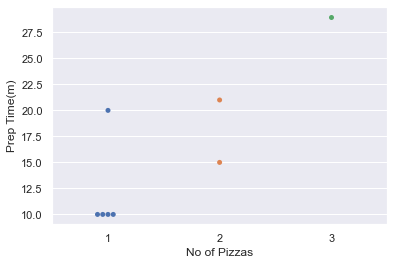

In [21]:
df_b31 = orders.groupby(['order_id','order_time'], as_index = False)['pizza_id'].count()
df_b31 = df_b31.merge(runner_orders[['order_id','pickup_time']],on ='order_id').dropna()
df_b31.rename(columns = {'pizza_id':'no_of_pizzas'}, inplace = True)
df_b31['Order_Prep_Time(m)'] = (((df_b31['pickup_time'] - df_b31['order_time']).astype(str)).str[10:12]).astype(int)

# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='no_of_pizzas',y='Order_Prep_Time(m)', data = df_b31)

# Label the axes
plt.xlabel('No of Pizzas')
plt.ylabel('Prep Time(m)')

# Show the plot
plt.show()

What was the average distance travelled for each customer?

In [22]:
x = runner_orders['distance'].dropna().astype(str).str.strip()
x = np.array(x.str.extract('([^km]+)')).astype(float)
print("Average distance travelled : ",np.mean(x))

Average distance travelled :  18.15


What was the difference between the longest and shortest delivery times for all orders?

In [23]:
y = runner_orders['duration'].dropna().astype(str).str.strip()
y=np.array(y.str.extract('([^a-zA-z]+)')).astype(float)
print((np.max(y)-np.min(y)).astype(int),"mins")

30 mins


What was the average speed for each runner for each delivery and do you notice any trend for these values?

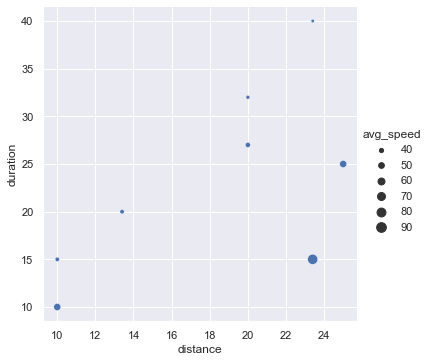

In [24]:
df_b61 = runner_orders[['order_id','runner_id','distance','duration']].dropna()
df_b61['distance'] = df_b61['distance'].dropna().astype(str).str.strip()
df_b61['distance'] = np.array(df_b61['distance'].str.extract('([^km]+)')).astype(float)
df_b61['duration'] = df_b61['duration'].dropna().astype(str).str.strip()
df_b61['duration']=np.array(df_b61['duration'].str.extract('([^a-zA-z]+)')).astype(float)

df_b61['avg_speed'] = round(df_b61['distance']/(df_b61['duration']/60),2)
sns.relplot(x="distance", y="duration", size="avg_speed",sizes=(10,100),data=df_b61);

What is the successful delivery percentage for each runner?

In [25]:
df_b71 = runner_orders.groupby('runner_id', as_index = False).agg({'cancellation':'count','order_id':'count'})
df_b71.rename(columns = {'cancellation':'no_of_cancellations','order_id':'total_orders'}, inplace = True)
df_b71['percentage'] = ((df_b71['total_orders']-df_b71['no_of_cancellations'])/df_b71['total_orders'])*100
print(df_b71[['runner_id','percentage']])

   runner_id  percentage
0          1       100.0
1          2        75.0
2          3        50.0


<b> C. Ingredient Optimisation </b>

What are the standard ingredients for each pizza?

In [26]:
import pandas as pd
pd.options.mode.chained_assignment = None

pizza_recipes['toppings'] = pizza_recipes['toppings'].str.replace(' ','')
pizza_recipes['toppings_new'] = pizza_recipes['toppings'].str.split(',') 

for i in range(len(pizza_recipes)):
    pizza_recipes['toppings_new'][i]=[int(x) for x in pizza_recipes['toppings_new'][i]]
    print("For Pizza",pizza_names[pizza_names['pizza_id']==pizza_recipes['pizza_id'][i]]['pizza_name'].to_string(index=False),\
                                   ":",list(pizza_toppings[pizza_toppings['topping_id'].\
                                                       isin(pizza_recipes['toppings_new'][i])]['topping_name']))

For Pizza Meat Lovers : ['Bacon', 'BBQ Sauce', 'Beef', 'Cheese', 'Chicken', 'Mushrooms', 'Pepperoni', 'Salami']
For Pizza Vegetarian : ['Cheese', 'Mushrooms', 'Onions', 'Peppers', 'Tomatoes', 'Tomato Sauce']


What was the most commonly added extra?

In [27]:
orders = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'orders')
x=list(orders['extras'].dropna().astype(str).str.replace(' ','').str.split(','))

y=[]
for i in range(len(x)):
    y +=x[i]

from collections import Counter
z = Counter(y)
z = max(z, key=z.get)
print("Most commonly added extra :-",pizza_toppings[pizza_toppings['topping_id'] == int(z)]['topping_name'].to_string(index=False))

Most commonly added extra :- Bacon


What was the most common exclusion?

In [28]:
orders = pd.read_excel("CS2_Dataset.xlsx",sheet_name = 'orders')
x=list(orders['exclusions'].dropna().astype(str).str.replace(' ','').str.split(','))

y=[]
for i in range(len(x)):
    y +=x[i]

from collections import Counter
z = Counter(y)
z = max(z, key=z.get)
print("Most common exclusion :-",pizza_toppings[pizza_toppings['topping_id'] == int(z)]['topping_name'].to_string(index=False))

Most common exclusion :- Cheese


Generate an order item for each record in the customers_orders table in the format of one of the following:

o	Meat Lovers

o	Meat Lovers - Exclude Beef

o	Meat Lovers - Extra Bacon

o	Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers


In [29]:
df_c41 = orders[['order_id','pizza_id','exclusions','extras']]
df_c41= df_c41.merge(pizza_names,on= 'pizza_id')



df_c42 = df_c41[['order_id','exclusions']].copy().dropna()
df_c42['exclusions_new'] = df_c42['exclusions'].astype(str).str.replace(' ','').str.split(',')
z = df_c42['exclusions_new'].index
y = []
for i in z:
    df_c42['exclusions_new'][i]=[int(x) for x in df_c42['exclusions_new'][i]]
    x = list(pizza_toppings[pizza_toppings['topping_id'].isin(df_c42['exclusions_new'][i])]['topping_name'])
    y.append(x)   
df_c42['excl_name'] = ""
for i,l1,o in zip(range(len(y)),y,df_c42.index):
    for j in range(len(l1)):
        string = ' '.join([str(y[i][j])])
        df_c42['excl_name'][o] = df_c42['excl_name'][o]+','+string        
df_c42['excl_name'] = df_c42['excl_name'].str.lstrip(',')




df_c43 = df_c41[['order_id','extras']].copy().dropna()
df_c43['extras_new'] = df_c43['extras'].astype(str).str.replace(' ','').str.split(',')
z = df_c43['extras_new'].index
y = []
for i in z:
    df_c43['extras_new'][i]=[int(x) for x in df_c43['extras_new'][i]]
    x = list(pizza_toppings[pizza_toppings['topping_id'].isin(df_c43['extras_new'][i])]['topping_name'])
    y.append(x)    
df_c43['extra_name'] = ""
for i,l1,o in zip(range(len(y)),y,df_c43.index):
    for j in range(len(l1)):
        string = ' '.join([str(y[i][j])])
        df_c43['extra_name'][o] = df_c43['extra_name'][o]+','+string        
df_c43['extra_name'] = df_c43['extra_name'].str.lstrip(',')



df_c41 = df_c41.join(df_c43['extra_name']).join(df_c42['excl_name'])



df_c42 = df_c41[['pizza_name','extra_name','excl_name']].copy()
df_c42.loc[~df_c42['extra_name'].isnull()]['extra_name']  = "Extras "+df_c42.loc[~df_c42['extra_name'].isnull()]['extra_name']

df_c41['extras_name'] = " - Extras "+df_c42.loc[~df_c42['extra_name'].isnull()]['extra_name']
df_c41['excls_name'] = " - Exclusions "+df_c42.loc[~df_c42['excl_name'].isnull()]['excl_name']
df_c41 = df_c41.fillna('')

df_c41['new'] = df_c41['pizza_name'] + ' ' + df_c41['extras_name'] + ' '+ df_c41['excls_name']

#Final Output
for i in range(len(df_c41)):
    print(df_c41['new'][i])

Meat Lovers  
Meat Lovers  
Meat Lovers  
Meat Lovers   - Exclusions Cheese
Meat Lovers   - Exclusions Cheese
Meat Lovers  - Extras Bacon 
Meat Lovers  
Meat Lovers  - Extras Bacon,Chicken  - Exclusions Cheese
Meat Lovers  
Meat Lovers  - Extras Bacon,Cheese  - Exclusions BBQ Sauce,Mushrooms
Vegetarian  
Vegetarian   - Exclusions Cheese
Vegetarian  
Vegetarian  - Extras Bacon 


What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?

In [30]:
df_c61 = df_c41[['order_id','pizza_id','pizza_name','extra_name','excl_name']].\
merge(pizza_recipes[['pizza_id','toppings_new']],on='pizza_id')

y=[]
for i in df_c61.index:
    df_c61['toppings_new'][i]=[int(x) for x in df_c61['toppings_new'][i]]
    x = list(pizza_toppings[pizza_toppings['topping_id'].isin(df_c61['toppings_new'][i])]['topping_name'])
    y.append(x)
    
df_c61['topping_name'] = ""
for i,l1,o in zip(range(len(y)),y,df_c61.index):
    for j in range(len(l1)):
        string = ' '.join([str(y[i][j])])
        df_c61['topping_name'][o] = df_c61['topping_name'][o]+','+string
        
df_c61['topping_name'] = df_c61['topping_name'].str.lstrip(',')
del df_c61['toppings_new']
df_c61['items'] = df_c61['topping_name']
for i in range(len(df_c61)):
    if df_c61['extra_name'][i] != "":
        df_c61['items'][i] = df_c61['extra_name'][i] +','+df_c61['topping_name'][i]
    df_c61['items'][i] = df_c61['items'][i].replace(str(df_c61['excl_name'][i]), '')
    df_c61['items'][i] = df_c61['items'][i].replace(",,",",")
    
    
import itertools
ingredient=''
for i in range(len(df_c61)):
    ingredient= ingredient+ df_c61['items'][i]+','
ingredient = ingredient.replace(",,",",")
ingredient = ingredient.split(",")
del ingredient[-1]
ingredient

import collections
counter=collections.Counter(ingredient)

print(counter)

Counter({'Bacon': 14, 'Mushrooms': 14, 'Cheese': 11, 'Chicken': 11, 'BBQ Sauce': 10, 'Beef': 10, 'Pepperoni': 10, 'Salami': 10, 'Onions': 4, 'Peppers': 4, 'Tomatoes': 4, 'Tomato Sauce': 4})


<b> D) Pricing and Ratings </b>

If a Meat Lovers pizza costs \\$12 and Vegetarian costs \\$10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?

In [31]:
df_d11 = orders.merge(runner_orders,on = 'order_id')
df_d11 = df_d11[df_d11.cancellation.isnull()]
print("Money in dollars:",df_d11[df_d11['pizza_id']==1]['pizza_id'].count()*10 \
      +df_d11[df_d11['pizza_id']==2]['pizza_id'].count()*12)

Money in dollars: 126


What if there was an additional $1 charge for any pizza extras?

In [32]:
ingredient=''
for i in range(len(df_c61)):
    if df_c61['extra_name'][i] != "":
        ingredient= ingredient+ df_c61['extra_name'][i]+','
ingredient = ingredient.split(",")
del ingredient[-1]
print("Money in dollars:",df_d11[df_d11['pizza_id']==1]['pizza_id'].count()*10 \
      +df_d11[df_d11['pizza_id']==2]['pizza_id'].count()*12\
      +len(ingredient))

Money in dollars: 132


The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a new table and insert your own data for ratings for each successful customer order between 1 to 5.

In [33]:
ratings = runner_orders[runner_orders.cancellation.isnull()][['order_id','runner_id']].merge(orders[['order_id','customer_id','order_time']],on='order_id')
ratings.drop_duplicates(inplace=True,ignore_index=True)
ratings['rating']=[2,5,3,4,5,4,1,3]
ratings

,order_id,runner_id,customer_id,order_time,rating
0,1,1,101,2021-01-01 18:05:02,2
1,2,1,101,2021-01-01 19:00:52,5
2,3,1,102,2021-01-02 23:51:23,3
3,4,2,103,2021-01-04 13:23:46,4
4,5,3,104,2021-01-08 21:00:29,5
5,7,2,105,2021-01-08 21:20:29,4
6,8,2,102,2021-01-09 23:54:33,1
7,10,1,104,2021-01-11 18:34:49,3


Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?<br>
o	customer_id<br>
o	order_id<br>
o	runner_id<br>
o	rating<br>
o	order_time<br>
o	pickup_time<br>
o	Time between order and pickup<br>
o	Delivery duration<br>
o	Average speed<br>
o	Total number of pizzas<br>


In [34]:
x= runner_orders[runner_orders['cancellation'].isnull()].copy()
y = x['duration'].dropna().astype(str).str.strip()
y=np.array(y.str.extract('([^a-zA-z]+)')).astype(float)
y.astype(int)
x['duration']=y

df_d41=orders.groupby(['order_id','customer_id','order_time'],as_index = False)['pizza_id'].count()
df_d41 = df_d41.merge(df_b21[['runner_id','pickup_time','order_id']],on='order_id')\
.merge(ratings[['order_id','rating']],on='order_id')\
.merge( x[['order_id','duration','runner_id']],on = ['order_id','runner_id'])\
.merge(df_b61[['runner_id','order_id','avg_speed']],on=['order_id','runner_id'])
df_d41.rename(columns={'pizza_id':'no_pizza'},inplace=True)
df_d41['time_between_order_pickup']=df_d41['pickup_time']-df_d41['order_time']

df_d41

,order_id,customer_id,order_time,no_pizza,runner_id,pickup_time,rating,duration,avg_speed,time_between_order_pickup
0,1,101,2021-01-01 18:05:02,1,1,2021-01-01 18:15:34,2,32.0,37.50,0 days 00:10:32
1,2,101,2021-01-01 19:00:52,1,1,2021-01-01 19:10:54,5,27.0,44.44,0 days 00:10:02
2,3,102,2021-01-02 23:51:23,2,1,2021-01-03 00:12:37,3,20.0,40.20,0 days 00:21:14
3,4,103,2021-01-04 13:23:46,3,2,2021-01-04 13:53:03,4,40.0,35.10,0 days 00:29:17
4,5,104,2021-01-08 21:00:29,1,3,2021-01-08 21:10:57,5,15.0,40.00,0 days 00:10:28
5,7,105,2021-01-08 21:20:29,1,2,2021-01-08 21:30:45,4,25.0,60.00,0 days 00:10:16
6,8,102,2021-01-09 23:54:33,1,2,2021-01-10 00:15:02,1,15.0,93.60,0 days 00:20:29
7,10,104,2021-01-11 18:34:49,2,1,2021-01-11 18:50:20,3,10.0,60.00,0 days 00:15:31


If a Meat Lovers pizza was \\$12 and Vegetarian \\$10 fixed prices with no cost for extras and each runner is paid $0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?

In [35]:
runner_payment = sum(df_b61['distance'])*0.3
print("Money in dollars:",df_d11[df_d11['pizza_id']==1]['pizza_id'].count()*10 \
      +df_d11[df_d11['pizza_id']==2]['pizza_id'].count()*12-runner_payment)

Money in dollars: 82.44
